In [ ]:
import pandas as pd

#Loading the file.
file_path = "/content/2023 NYPD Arrest Data.csv"
df = pd.read_csv(file_path)

#Display basic info.
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226441 entries, 0 to 226440
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_KEY         226441 non-null  int64  
 1   ARREST_DATE        226441 non-null  object 
 2   PD_CD              226439 non-null  float64
 3   PD_DESC            226441 non-null  object 
 4   KY_CD              226424 non-null  float64
 5   OFNS_DESC          226441 non-null  object 
 6   LAW_CODE           226441 non-null  object 
 7   LAW_CAT_CD         224842 non-null  object 
 8   ARREST_BORO        226441 non-null  object 
 9   ARREST_PRECINCT    226441 non-null  int64  
 10  JURISDICTION_CODE  226441 non-null  int64  
 11  AGE_GROUP          226441 non-null  object 
 12  PERP_SEX           226441 non-null  object 
 13  PERP_RACE          226441 non-null  object 
 14  X_COORD_CD         226441 non-null  int64  
 15  Y_COORD_CD         226441 non-null  int64  
 16  La

(None,
    ARREST_KEY ARREST_DATE  PD_CD                                    PD_DESC  \
 0   279746974  12/31/2023  397.0             ROBBERY,OPEN AREA UNCLASSIFIED   
 1   279763517  12/31/2023  106.0               ASSAULT POLICE/PEACE OFFICER   
 2   279766977  12/31/2023  115.0                    RECKLESS ENDANGERMENT 2   
 3   279739174  12/31/2023  105.0                          STRANGULATION 1ST   
 4   279741104  12/31/2023  439.0  LARCENY,GRAND FROM OPEN AREAS, UNATTENDED   
 
    KY_CD                    OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
 0  105.0                      ROBBERY  PL 1600500          F           M   
 1  106.0               FELONY ASSAULT  PL 1200503          F           Q   
 2  355.0  OFFENSES AGAINST THE PERSON  PL 1202000          M           K   
 3  106.0               FELONY ASSAULT  PL 1211200          F           K   
 4  109.0                GRAND LARCENY  PL 1553001          F           Q   
 
    ARREST_PRECINCT  JURISDICTION_CODE AGE_GROU

<Figure size 1000x600 with 0 Axes>

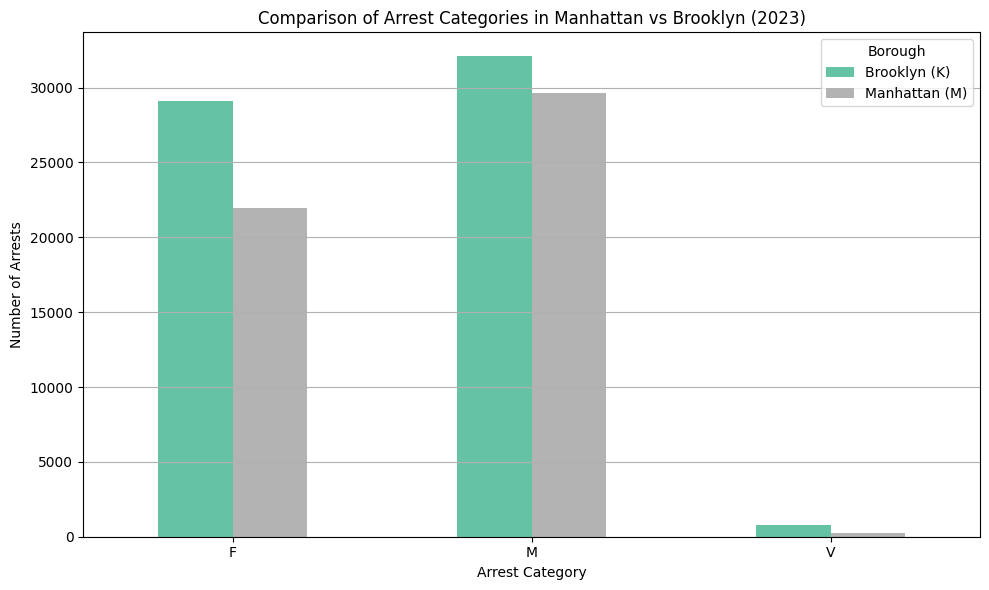

LAW_CAT_CD,(null),9,F,I,M,V
ARREST_BORO,,,,,,
K,2,12,29122,89,32087,754
M,0,26,21958,56,29657,245


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Cleaning: remove rows with missing LAW_CAT_CD or invalid ARREST_BORO
clean_df = df.dropna(subset=['LAW_CAT_CD'])
clean_df = clean_df[clean_df['ARREST_BORO'].isin(['M', 'K'])]  # M = Manhattan, K = Brooklyn

#Descriptive statistics: count of LAW_CAT_CD per borough
category_counts = clean_df.groupby(['ARREST_BORO', 'LAW_CAT_CD']).size().unstack(fill_value=0)

#Remove unexpected or invalid categories.
valid_categories = ['F', 'M', 'V']
filtered_counts = category_counts[valid_categories]

#Plotting.
plt.figure(figsize=(10, 6))
filtered_counts.T.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Comparison of Arrest Categories in Manhattan vs Brooklyn (2023)')
plt.xlabel('Arrest Category')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0)
plt.legend(title='Borough', labels=['Brooklyn (K)', 'Manhattan (M)'])
plt.tight_layout()
plt.grid(axis='y')
plt.show()

#Show descriptive statistics.
category_counts

# Summary: Brooklyn leads with a slightly higher Misdemeanor and Violations, while having a signifigant Felony count over Manhattan.

<Figure size 1200x600 with 0 Axes>

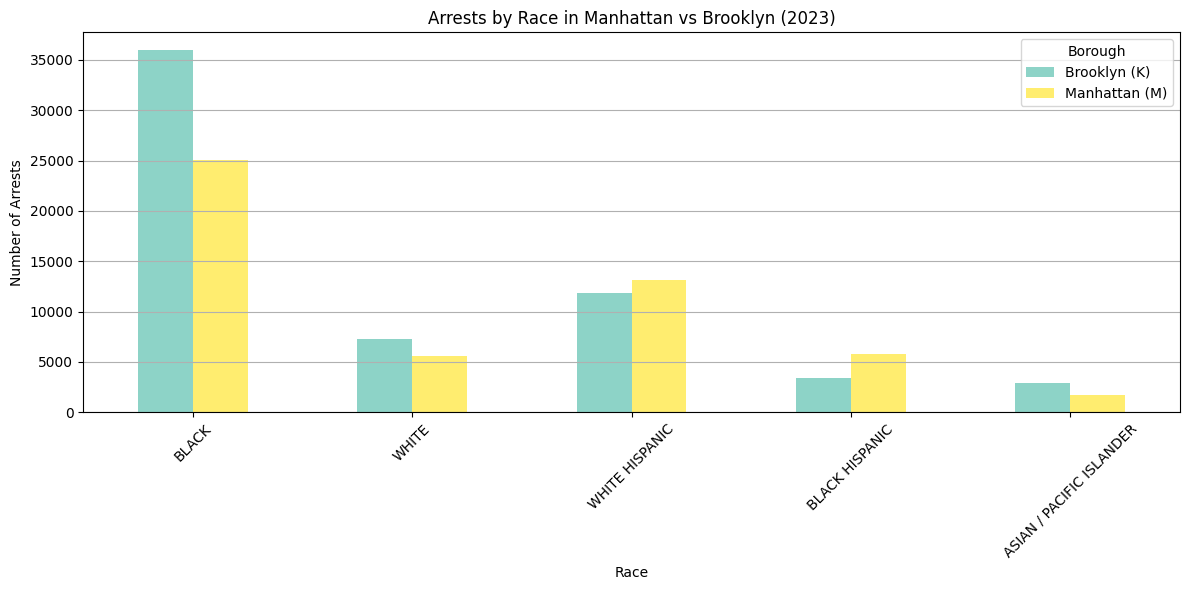

PERP_RACE,BLACK,WHITE,WHITE HISPANIC,BLACK HISPANIC,ASIAN / PACIFIC ISLANDER
ARREST_BORO,,,,,
K,35945,7223,11851,3384,2850
M,25018,5537,13094,5737,1662


In [ ]:
#Group by borough and perpetrator race, then count
race_counts = clean_df.groupby(['ARREST_BORO', 'PERP_RACE']).size().unstack(fill_value=0)

#Filter to show only top races for plotting.
top_races = ['BLACK', 'WHITE', 'WHITE HISPANIC', 'BLACK HISPANIC', 'ASIAN / PACIFIC ISLANDER']
race_counts_filtered = race_counts[top_races]

#Plotting.
plt.figure(figsize=(12, 6))
race_counts_filtered.T.plot(kind='bar', figsize=(12, 6), colormap='Set3')
plt.title('Arrests by Race in Manhattan vs Brooklyn (2023)')
plt.xlabel('Race')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.legend(title='Borough', labels=['Brooklyn (K)', 'Manhattan (M)'])
plt.tight_layout()
plt.grid(axis='y')
plt.show()

#Show the filtered race counts.
race_counts_filtered

#Summary: Blacks account for a signifigant portion of arrests in both Manhattan and Brooklyn.